In [214]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [215]:
# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

In [216]:
# Read the City Data
city_data = pd.read_csv("data/city_data.csv")
city_data.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [217]:
# Read the Ride Data

ride_data = pd.read_csv("data/ride_data.csv")
ride_data.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [218]:
# Combine the data into a single dataset
combined_data = pd.merge(city_data, ride_data, on="city")

# Display the data table for preview
combined_data.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [219]:
# Organized order of columns
organized_combined_data = combined_data[["city","date","fare","ride_id","driver_count","type"]]
organized_combined_data.head()


,city,date,fare,ride_id,driver_count,type
0,Richardfort,2018-02-24 08:40:38,13.93,5628545007794,38,Urban
1,Richardfort,2018-02-13 12:46:07,14.00,910050116494,38,Urban
2,Richardfort,2018-02-16 13:52:19,17.92,820639054416,38,Urban
3,Richardfort,2018-02-01 20:18:28,10.26,9554935945413,38,Urban
4,Richardfort,2018-04-17 02:26:37,23.00,720020655850,38,Urban


In [220]:
# Get status about types of data on dataset
organized_combined_data.dtypes

city             object
date             object
fare            float64
ride_id           int64
driver_count      int64
type             object
dtype: object

In [221]:
organized_combined_data.count()


city            2375
date            2375
fare            2375
ride_id         2375
driver_count    2375
type            2375
dtype: int64

In [222]:
# Get main statistics summary on dataset
organized_combined_data.describe()


,fare,ride_id,driver_count
count,2375.000000,2.375000e+03,2375.000000
mean,26.753112,4.887270e+12,28.930105
std,12.109465,2.907361e+12,20.666306
min,4.050000,3.218337e+08,1.000000
25%,17.190000,2.381175e+12,11.000000
50%,26.600000,4.748541e+12,23.000000
75%,36.645000,7.461936e+12,45.000000
max,58.550000,9.991538e+12,73.000000


In [223]:
# Split up our data into groups based upon 'type' and  'city'
type_groups = organized_combined_data.groupby(['type', 'city'])

# Find out the average fare per city
type_groups_fare = pd.DataFrame(type_groups["fare"].mean())
type_groups_fare.head()


fare
type  city                     
Rural Bradshawfurt    40.064000
      Garzaport       24.123333
      Harringtonfort  33.470000
      Jessicaport     36.013333
      Lake Jamie      34.358333

In [224]:
# Find out the total number of rides per city
type_groups_rides = pd.DataFrame(type_groups["ride_id"].count())
type_groups_rides.head()

ride_id
type  city                   
Rural Bradshawfurt         10
      Garzaport             3
      Harringtonfort        6
      Jessicaport           6
      Lake Jamie            6

In [225]:
# Find out the total number of drivers per city
type_groups_drivers = pd.DataFrame(type_groups["driver_count"].max())
type_groups_drivers.head()

driver_count
type  city                        
Rural Bradshawfurt               7
      Garzaport                  7
      Harringtonfort             4
      Jessicaport                1
      Lake Jamie                 4

## Bubble Plot of Ride Sharing Data

In [226]:
# Obtain the x and y coordinates for each of the three city types

# Build the scatter plots for each city types

# Incorporate the other graph properties

# Create a legend

# Incorporate a text label regarding circle size

# Save Figure


In [227]:
# Obtain the y coordinates for urban city type
average_fare_urban = type_groups_fare.loc["Urban",["fare"]]
average_fare_urban.head()

,fare
city,
Amandaburgh,24.641667
Barajasview,25.332273
Carriemouth,28.314444
Christopherfurt,24.501852
Deanville,25.842632


In [228]:
# Obtain the y coordinates for suburban city type
average_fare_suburban = type_groups_fare.loc["Suburban",["fare"]]
average_fare_suburban.head()


,fare
city,
Barronchester,36.422500
Bethanyland,32.956111
Brandonfort,35.437368
Colemanland,30.894545
Davidfurt,31.995882


In [229]:
# Obtain the y coordinates for rural city type
average_fare_rural = type_groups_fare.loc["Rural",["fare"]]
average_fare_rural.head()

,fare
city,
Bradshawfurt,40.064000
Garzaport,24.123333
Harringtonfort,33.470000
Jessicaport,36.013333
Lake Jamie,34.358333


In [230]:
# Obtain the x coordinates for urban city type
total_rides_urban = type_groups_rides.loc["Urban",["ride_id"]]
total_rides_urban.head()

,ride_id
city,
Amandaburgh,18
Barajasview,22
Carriemouth,27
Christopherfurt,27
Deanville,19


In [231]:
# Obtain the x coordinates for suburban city type
total_rides_suburban = type_groups_rides.loc["Suburban",["ride_id"]]
total_rides_suburban.head()

,ride_id
city,
Barronchester,16
Bethanyland,18
Brandonfort,19
Colemanland,22
Davidfurt,17


In [232]:
# Obtain the x coordinates for rural city type
total_rides_rural = type_groups_rides.loc["Rural",["ride_id"]]
total_rides_rural.head()

,ride_id
city,
Bradshawfurt,10
Garzaport,3
Harringtonfort,6
Jessicaport,6
Lake Jamie,6


In [233]:
# Obtain the bubble size coordinates for urban city type
driver_count_urban = type_groups_drivers.loc["Urban",["driver_count"]]
driver_count_urban.head()

,driver_count
city,
Amandaburgh,12
Barajasview,26
Carriemouth,52
Christopherfurt,41
Deanville,49


In [234]:
# Obtain the bubble size coordinates for suburban city type
driver_count_suburban = type_groups_drivers.loc["Suburban",["driver_count"]]
driver_count_urban.head()

,driver_count
city,
Amandaburgh,12
Barajasview,26
Carriemouth,52
Christopherfurt,41
Deanville,49


In [235]:
# Obtain the bubble size coordinates for rural city type
driver_count_rural = type_groups_drivers.loc["Rural",["driver_count"]]
driver_count_rural.head()

,driver_count
city,
Bradshawfurt,7
Garzaport,7
Harringtonfort,4
Jessicaport,1
Lake Jamie,4


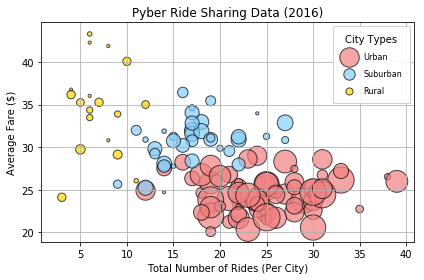

In [295]:
# Build the scatter plots for each city types

plt.scatter (total_rides_urban, average_fare_urban, driver_count_urban*10, label="Urban", 
          facecolors="lightcoral", edgecolors="black", alpha=0.7, linewidth=1, marker="o")

plt.scatter (total_rides_suburban, average_fare_suburban, driver_count_suburban*10, label="Suburban", 
          facecolors="lightskyblue", edgecolors="black", alpha=0.7, linewidth=1, marker="o")

plt.scatter (total_rides_rural, average_fare_rural, driver_count_rural*10, label="Rural", 
          facecolors="gold", edgecolors="black", alpha=0.7, linewidth=1, marker="o")


# Incorporate title and labels into the scatter plots 

plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")

plt.legend(borderpad=1, frameon=True,labelspacing=1, framealpha=0.9, loc="best", scatterpoints=1, 
           fontsize=10, markerscale=1., numpoints=1, prop={'size':8}, title="City Types")


plt.grid()
plt.savefig("images/RideData.png")
plt.tight_layout()
plt.show()



## Total Fares by City Type

In [252]:
# Split up our data into groups based upon 'type'
type_only_groups = organized_combined_data.groupby(['type'])


# Find out the total fares per type city
sum_groups_fare = pd.DataFrame(type_only_groups["fare"].sum())
sum_groups_fare.head()


,fare
type,
Rural,4327.93
Suburban,19356.33
Urban,39854.38


In [253]:
total_fares = sum_groups_fare.sum()
total_fares


fare    63538.64
dtype: float64

In [254]:
fare_only_combined_data = combined_data[["type","fare"]]
fare_only_combined_data.head()


,type,fare
0,Urban,13.93
1,Urban,14.00
2,Urban,17.92
3,Urban,10.26
4,Urban,23.00


In [255]:
index_fare_only_combined_data = fare_only_combined_data.set_index('type')
index_fare_only_combined_data.head()

,fare
type,
Urban,13.93
Urban,14.00
Urban,17.92
Urban,10.26
Urban,23.00


In [256]:
urban_only_fares = index_fare_only_combined_data.loc["Urban"]
urban_only_fares.head()

,fare
type,
Urban,13.93
Urban,14.00
Urban,17.92
Urban,10.26
Urban,23.00


In [257]:
sum_urban_only_fares = urban_only_fares.sum()
sum_urban_only_fares

fare    39854.38
dtype: float64

In [258]:
suburban_only_fares = index_fare_only_combined_data.loc["Suburban"]
suburban_only_fares.head()

,fare
type,
Suburban,27.66
Suburban,42.26
Suburban,14.95
Suburban,19.03
Suburban,31.58


In [259]:
sum_suburban_only_fares = suburban_only_fares.sum()
sum_suburban_only_fares

fare    19356.33
dtype: float64

In [260]:
rural_only_fares = index_fare_only_combined_data.loc["Rural"]
rural_only_fares.head()

,fare
type,
Rural,21.63
Rural,48.79
Rural,32.20
Rural,14.11
Rural,43.25


In [261]:
sum_rural_only_fares = rural_only_fares.sum()
sum_rural_only_fares

fare    4327.93
dtype: float64

In [262]:
perc_urban_fares = sum_urban_only_fares / total_fares
perc_urban_fares

fare    0.627246
dtype: float64

In [263]:
perc_suburban_fares = sum_suburban_only_fares / total_fares
perc_suburban_fares

fare    0.304639
dtype: float64

In [264]:
perc_rural_fares = sum_rural_only_fares / total_fares
perc_rural_fares

fare    0.068115
dtype: float64

In [265]:
# Labels for the sections of our pie chart
labels = ["Urban", "Suburban", "Rural"]

# The values of each section of the pie chart
sizes = [perc_urban_fares, perc_suburban_fares, perc_rural_fares]

# The colors of each section of the pie chart
colors = ["lightcoral", "lightskyblue", "gold"]

# Tells matplotlib to separate the "Urban" section from the others
explode = (0.1, 0, 0)

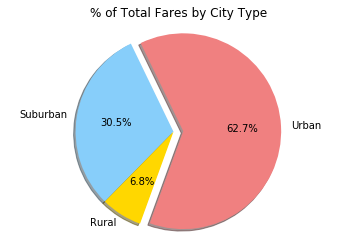

In [266]:
# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=250)

plt.title("% of Total Fares by City Type")

plt.axis("equal")
plt.savefig("images/TotalFares.png")
plt.show()



## Total Rides by City Type

In [277]:
# Split up our data into groups based upon 'type'
type_only_groups = organized_combined_data.groupby(['type'])


# Find out the total rides per type city
sum_groups_rides = pd.DataFrame(type_only_groups["ride_id"].count())
sum_groups_rides.head()

,ride_id
type,
Rural,125
Suburban,625
Urban,1625


In [268]:
sum_total_rides_urban = total_rides_urban.sum()
sum_total_rides_urban

ride_id    1625
dtype: int64

In [269]:
sum_total_rides_suburban = total_rides_suburban.sum()
sum_total_rides_suburban

ride_id    625
dtype: int64

In [270]:
sum_total_rides_rural = total_rides_rural.sum()
sum_total_rides_rural

ride_id    125
dtype: int64

In [271]:
total_rides = sum_total_rides_urban + sum_total_rides_suburban + sum_total_rides_rural
total_rides

ride_id    2375
dtype: int64

In [272]:
per_total_rides_urban = sum_total_rides_urban / total_rides
per_total_rides_urban

ride_id    0.684211
dtype: float64

In [273]:
per_total_rides_suburban = sum_total_rides_suburban / total_rides
per_total_rides_suburban

ride_id    0.263158
dtype: float64

In [274]:
per_total_rides_rural = sum_total_rides_rural / total_rides
per_total_rides_rural

ride_id    0.052632
dtype: float64

In [275]:
# Labels for the sections of our pie chart
labels = ["Urban", "Suburban", "Rural"]

# The values of each section of the pie chart
sizes = [per_total_rides_urban, per_total_rides_suburban, per_total_rides_rural]

# The colors of each section of the pie chart
colors = ["lightcoral", "lightskyblue", "gold"]

# Tells matplotlib to separate the "Urban" section from the others
explode = (0.1, 0, 0)

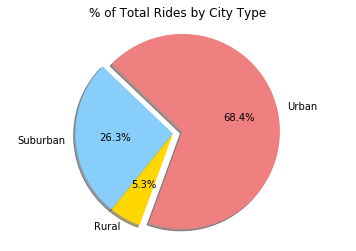

In [276]:
# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=250)

plt.title("% of Total Rides by City Type")

plt.axis("equal")
plt.savefig("images/TotalRides.png")
plt.show()



## Total Drivers by City Type

In [284]:
type_groups_drivers.sum()


driver_count    2973
dtype: int64

In [286]:
total_drivers_urban = driver_count_urban.sum()
total_drivers_urban

driver_count    2405
dtype: int64

In [285]:
total_drivers_suburban = driver_count_suburban.sum()
total_drivers_suburban

driver_count    490
dtype: int64

In [287]:
total_drivers_rural = driver_count_rural.sum()
total_drivers_rural

driver_count    78
dtype: int64

In [288]:
total_drivers = total_drivers_urban + total_drivers_suburban + total_drivers_rural
total_drivers

driver_count    2973
dtype: int64

In [289]:
per_total_drivers_urban = total_drivers_urban / total_drivers
per_total_drivers_urban

driver_count    0.808947
dtype: float64

In [290]:
per_total_drivers_suburban = total_drivers_suburban / total_drivers
per_total_drivers_suburban

driver_count    0.164817
dtype: float64

In [291]:
per_total_drivers_rural = total_drivers_rural / total_drivers
per_total_drivers_rural

driver_count    0.026236
dtype: float64

In [292]:
# Labels for the sections of our pie chart
labels = ["Urban", "Suburban", "Rural"]

# The values of each section of the pie chart
sizes = [per_total_drivers_urban, per_total_drivers_suburban, per_total_drivers_rural]

# The colors of each section of the pie chart
colors = ["lightcoral", "lightskyblue", "gold"]

# Tells matplotlib to separate the "Urban" section from the others
explode = (0.1, 0, 0)

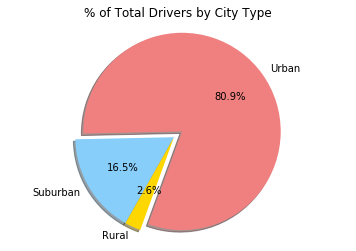

In [293]:
# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=250)

plt.title("% of Total Drivers by City Type")

plt.axis("equal")
plt.savefig("images/TotalDrivers.png")
plt.show()